In [3]:
import pandas as analytics

In [174]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

united_states_map = mpimg.imread("../data/pictures/final_map.jpg")
def show_cities(path, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]    
    imshow(united_states_map)    
    for x0, y0 in path:
        plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point        
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

    
def show_path(path, starting_city=None, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]
    
    starting_city = starting_city or path[0]
    x, y = list(zip(*path))
    #_, (x0, y0) = starting_city
    (x0, y0) = starting_city
    imshow(united_states_map)
    # plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point
    plt.plot(x + x[:1], y + y[:1])  # include the starting point at the end of path
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])
    
    
def polyfit_plot(x,y,deg, **kwargs):
    coefficients = np.polyfit(x,y,deg,**kwargs)
    poly  = np.poly1d(coefficients)
    new_x = np.linspace(x[0], x[-1])
    new_y = poly(new_x)
    plt.plot(x, y, "o", new_x, new_y)
    plt.xlim([x[0]-1, x[-1] + 1 ])
    
    terms = []
    for p, c in enumerate(reversed(coefficients)):
        term = str(round(c,1))
        if p == 1: term += 'x'
        if p >= 2: term += 'x^'+str(p)
        terms.append(term)        
    plt.title(" + ".join(reversed(terms)))    



In [89]:
cities = {'0': (53.0, 71.0),
 '1': (102.0, 853.0),
 '2': (125.0, 602.0),
 '3': (130.0, 568.0),
 '4': (136.0, 545.0),
 '5': (142.0, 467.0),
 '6': (149.0, 643.0),
 '7': (165.0, 378.0),
 '8': (200.0, 294.0),
 '9': (230.0, 557.0),
 '10': (233.0, 392.0),
 '11': (245.0, 587.0),
 '12': (261.0, 466.0),
 '13': (275.0, 274.0),
 '14': (286.0, 396.0),
 '15': (290.0, 335.0),
 '16': (304.0, 508.0),
 '17': (319.0, 507.0),
 '18': (359.0, 640.0),
 '19': (390.0, 408.0),
 '20': (460.0, 451.0),
 '21': (512.0, 437.0),
 '22': (522.0, 521.0),
 '23': (529.0, 350.0),
 '24': (583.0, 451.0),
 '25': (602.0, 362.0),
 '26': (637.0, 325.0),
 '27': (655.0, 447.0),
 '28': (693.0, 439.0),
 '29': (700.0, 369.0),
 '30': (715.0, 413.0),
 '31': (740.0, 400.0),
 '32': (749.0, 553.0),
 '33': (753.0, 832.0),
 '34': (754.0, 832.0),
 '35': (755.0, 832.0),
 '36': (756.0, 832.0),
 '37': (758.0, 832.0),
 '38': (762.0, 457.0),
 '39': (795.0, 475.0)}
cities

{'0': (53.0, 71.0),
 '1': (102.0, 853.0),
 '2': (125.0, 602.0),
 '3': (130.0, 568.0),
 '4': (136.0, 545.0),
 '5': (142.0, 467.0),
 '6': (149.0, 643.0),
 '7': (165.0, 378.0),
 '8': (200.0, 294.0),
 '9': (230.0, 557.0),
 '10': (233.0, 392.0),
 '11': (245.0, 587.0),
 '12': (261.0, 466.0),
 '13': (275.0, 274.0),
 '14': (286.0, 396.0),
 '15': (290.0, 335.0),
 '16': (304.0, 508.0),
 '17': (319.0, 507.0),
 '18': (359.0, 640.0),
 '19': (390.0, 408.0),
 '20': (460.0, 451.0),
 '21': (512.0, 437.0),
 '22': (522.0, 521.0),
 '23': (529.0, 350.0),
 '24': (583.0, 451.0),
 '25': (602.0, 362.0),
 '26': (637.0, 325.0),
 '27': (655.0, 447.0),
 '28': (693.0, 439.0),
 '29': (700.0, 369.0),
 '30': (715.0, 413.0),
 '31': (740.0, 400.0),
 '32': (749.0, 553.0),
 '33': (753.0, 832.0),
 '34': (754.0, 832.0),
 '35': (755.0, 832.0),
 '36': (756.0, 832.0),
 '37': (758.0, 832.0),
 '38': (762.0, 457.0),
 '39': (795.0, 475.0)}

In [156]:
def distance(xy1, xy2) -> float:
    if isinstance(xy1[0], str): xy1 = xy1[1]; xy2 = xy2[1];               # if xy1 == ("Name", (x,y))
    return math.sqrt( (xy1[0]-xy2[0])**2 + (xy1[1]-xy2[1])**2 )

def path_distance(path) -> int:
    if isinstance(path, dict):      path = list(path.values())            # if path == {"Name": (x,y)}
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]   # if path == ("Name", (x,y))
    return int(sum(
        [ distance(path[i],  path[i+1]) for i in range(len(path)-1) ]
      + [ distance(path[-1], path[0]) ]                                   # include cost of return journey
    ))

40


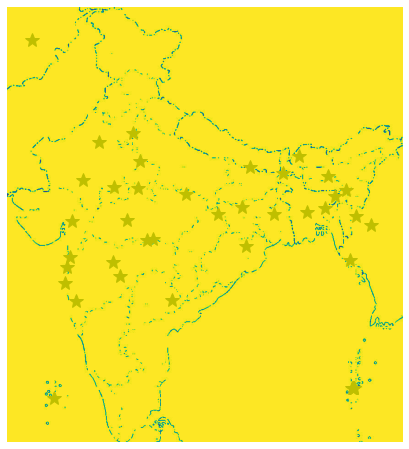

In [4]:
cities = list(sorted(cities.items()))
print(len(cities))
show_cities(cities)



In [66]:


import time
from itertools import chain
from typing import Any, Callable, List, Tuple, Union

import numpy as np
import random



class AntColonySolver:
    def __init__(self,
                 cost_fn:                 Callable[[Any,Any], Union[float,int]],                         
                 
                 time=0,                  # run for a fixed amount of time
                 min_time=0,              # minimum runtime
                 timeout=0,               # maximum time in seconds to run for
                 stop_factor=2,           # how many times to redouble effort after new new best path
                 min_round_trips=10,      # minimum number of round trips before stopping
                 max_round_trips=0,       # maximum number of round trips before stopping                 
                 min_ants=0,              # Total number of ants to use
                 max_ants=0,              # Total number of ants to use
                 
                 ant_count=64,            # this is the bottom of the near-optimal range for numpy performance
                 ant_speed=1,             # how many steps do ants travel per epoch

                 distance_power=1,        # power to which distance affects pheromones                 
                 pheromone_power=1.25,    # power to which differences in pheromones are noticed
                 decay_power=0,           # how fast do pheromones decay
                 reward_power=0,          # relative pheromone reward based on best_path_length/path_length 
                 best_path_smell=2,       # queen multiplier for pheromones upon finding a new best path                  
                 start_smell=0,           # amount of starting pheromones [0 defaults to `10**self.distance_power`]

                 verbose=False,

    ):
        assert callable(cost_fn)        
        self.cost_fn         = cost_fn
        self.time            = int(time)
        self.min_time        = int(min_time)
        self.timeout         = int(timeout)
        self.stop_factor     = float(stop_factor)
        self.min_round_trips = int(min_round_trips)
        self.max_round_trips = int(max_round_trips)
        self.min_ants        = int(min_ants)
        self.max_ants        = int(max_ants)
    
        self.ant_count       = int(ant_count)
        self.ant_speed       = int(ant_speed)
        
        self.distance_power  = float(distance_power)     
        self.pheromone_power = float(pheromone_power)
        self.decay_power     = float(decay_power)
        self.reward_power    = float(reward_power)
        self.best_path_smell = float(best_path_smell)
        self.start_smell     = float(start_smell or 10**self.distance_power)
        
        self.verbose         = int(verbose)
        self._initalized     = False
        
        if self.min_round_trips and self.max_round_trips: self.min_round_trips = min(self.min_round_trips, self.max_round_trips)
        if self.min_ants and self.max_ants:               self.min_ants        = min(self.min_ants, self.max_ants)


    def solve_initialize(
            self,
            problem_path: List[Any],
    ):
        ### Cache of distances between nodes
        self.distances = {
            source: {
                dest: self.cost_fn(source, dest)
                for dest in problem_path
            }
            for source in problem_path
        }

        ### Cache of distance costs between nodes - division in a tight loop is expensive
        self.distance_cost = {
            source: {
                dest: 1 / (1 + self.distances[source][dest]) ** self.distance_power
                for dest in problem_path
            }
            for source in problem_path
        }

        ### This stores the pheromone trail that slowly builds up
        self.pheromones = {
            source: {
                # Encourage the ants to start exploring in all directions and furthest nodes
                dest: self.start_smell
                for dest in problem_path
            }
            for source in problem_path
        }
        
        ### Sanitise input parameters
        if self.ant_count <= 0:
            self.ant_count = len(problem_path)
        if self.ant_speed <= 0:
            self.ant_speed = np.median(list(chain(*[ d.values() for d in self.distances.values() ]))) // 5
        self.ant_speed = int(max(1,self.ant_speed))
        
        ### Heuristic Exports
        self.ants_used   = 0
        self.epochs_used = 0
        self.round_trips = 0
        self._initalized = True        


    def solve(self,
              problem_path: List[Any],
              restart=False,
    ):
        if restart or not self._initalized:
            self.solve_initialize(problem_path)

        ### Here come the ants!
        ants = {
            "distance":    np.zeros((self.ant_count,)).astype('int32'),
            "path":        [ [ problem_path[0] ]   for n in range(self.ant_count) ],
            "remaining":   [ set(problem_path[1:]) for n in range(self.ant_count) ],
            "path_cost":   np.zeros((self.ant_count,)).astype('int32'),
            "round_trips": np.zeros((self.ant_count,)).astype('int32'),
        }

        best_path       = None
        best_path_cost  = np.inf
        best_epochs     = []
        epoch           = 0
        time_start      = time.perf_counter()
        while True:
            epoch += 1

            ### Vectorized walking of ants
            # Small optimization here, testing against `> self.ant_speed` rather than `> 0` 
            #       avoids computing ants_arriving in the main part of this tight loop
            ants_travelling = (ants['distance'] > self.ant_speed)
            ants['distance'][ ants_travelling ] -= self.ant_speed
            if all(ants_travelling):
                continue  # skip termination checks until the next ant arrives
            
            ### Vectorized checking of ants arriving
            ants_arriving       = np.invert(ants_travelling)
            ants_arriving_index = np.where(ants_arriving)[0]
            for i in ants_arriving_index:

                ### ant has arrived at next_node
                this_node = ants['path'][i][-1]
                next_node = self.next_node(ants, i)
                ants['distance'][i]  = self.distances[ this_node ][ next_node ]
                ants['remaining'][i] = ants['remaining'][i] - {this_node}
                ants['path_cost'][i] = ants['path_cost'][i] + ants['distance'][i]
                ants['path'][i].append( next_node )

                ### ant has returned home to the colony
                if not ants['remaining'][i] and ants['path'][i][0] == ants['path'][i][-1]:
                    self.ants_used  += 1
                    self.round_trips = max(self.round_trips, ants["round_trips"][i] + 1)

                    ### We have found a new best path - inform the Queen
                    was_best_path = False
                    if ants['path_cost'][i] < best_path_cost:
                        was_best_path  = True
                        best_path_cost = ants['path_cost'][i]
                        best_path      = ants['path'][i]
                        best_epochs   += [ epoch ]
                        if self.verbose:
                            print({
                                "path_cost":   int(ants['path_cost'][i]),
                                "ants_used":   self.ants_used,
                                "epoch":       epoch,
                                "round_trips": ants['round_trips'][i] + 1,
                                "clock":       int(time.perf_counter() - time_start),
                            })

                    ### leave pheromone trail
                    # doing this only after ants arrive home improves initial exploration
                    #  * self.round_trips has the effect of decaying old pheromone trails
                    # ** self.reward_power = -3 has the effect of encouraging ants to explore longer routes
                    #                           in combination with doubling pheromone for best_path
                    reward = 1
                    if self.reward_power: reward *= ((best_path_cost / ants['path_cost'][i]) ** self.reward_power)
                    if self.decay_power:  reward *= (self.round_trips ** self.decay_power)
                    for path_index in range( len(ants['path'][i]) - 1 ):
                        this_node = ants['path'][i][path_index]
                        next_node = ants['path'][i][path_index+1]
                        self.pheromones[this_node][next_node] += reward
                        self.pheromones[next_node][this_node] += reward
                        if was_best_path:
                            # Queen orders to double the number of ants following this new best path                            
                            self.pheromones[this_node][next_node] *= self.best_path_smell
                            self.pheromones[next_node][this_node] *= self.best_path_smell


                    ### reset ant
                    ants["distance"][i]     = 0
                    ants["path"][i]         = [ problem_path[0] ]
                    ants["remaining"][i]    = set(problem_path[1:])
                    ants["path_cost"][i]    = 0
                    ants["round_trips"][i] += 1


            ### Do we terminate?
            
            # Always wait for at least 1 solutions (note: 2+ solutions are not guaranteed)
            if not len(best_epochs): continue 
            
            # Timer takes priority over other constraints
            if self.time or self.min_time or self.timeout:
                clock = time.perf_counter() - time_start
                if self.time:
                    if clock > self.time: break
                    else:                 continue
                if self.min_time and clock < self.min_time: continue
                if self.timeout  and clock > self.timeout:  break
            
            # First epoch only has start smell - question: how many epochs are required for a reasonable result?
            if self.min_round_trips and self.round_trips <  self.min_round_trips: continue        
            if self.max_round_trips and self.round_trips >= self.max_round_trips: break

            # This factor is most closely tied to computational power                
            if self.min_ants and self.ants_used <  self.min_ants: continue        
            if self.max_ants and self.ants_used >= self.max_ants: break            
            
            # Lets keep redoubling our efforts until we can't find anything more
            if self.stop_factor and epoch > (best_epochs[-1] * self.stop_factor): break
                                
            # Nothing else is stopping us: Queen orders the ants to continue!      
            if True: continue
            
            
            
        ### We have (hopefully) found a near-optimal path, report back to the Queen
        self.epochs_used = epoch
        self.round_trips = np.max(ants["round_trips"])
        return best_path


    def next_node(self, ants, index):
        this_node   = ants['path'][index][-1]

        weights     = []
        weights_sum = 0
        if not ants['remaining'][index]: return ants['path'][index][0]  # return home
        for next_node in ants['remaining'][index]:
            if next_node == this_node: continue
            reward = (
                    self.pheromones[this_node][next_node] ** self.pheromone_power
                    * self.distance_cost[this_node][next_node]  # Prefer shorter paths
            )
            weights.append( (reward, next_node) )
            weights_sum   += reward

        # Pick a random path in proportion to the weight of the pheromone
        rand = random.random() * weights_sum
        for (weight, next_node) in weights:
            if rand > weight: rand -= weight
            else:             break
        return next_node
            
        
# def AntColonyRunner(cities, verbose=False, plot=False, label={}, algorithm=AntColonySolver, **kwargs):
#     solver     = algorithm(cost_fn=distance, verbose=verbose, **kwargs)
#     start_time = time.perf_counter()
#     result     = solver.solve(cities)
#     stop_time  = time.perf_counter()
#     if label: kwargs = { **label, **kwargs }
        
#     for key in ['verbose', 'plot', 'animate', 'label', 'min_time', 'max_time']:
#         if key in kwargs: del kwargs[key]
#     print("N={:<3d} | {:5.0f} -> {:4.0f} | {:4.0f}s | ants: {:5d} | trips: {:4d} | "
#           .format(len(cities), path_distance(cities), path_distance(result), (stop_time - start_time), solver.ants_used, solver.round_trips)
#           + " ".join([ f"{k}={v}" for k,v in kwargs.items() ])
#     )
#     if plot:
#         show_path(result)
#     return result



In [43]:
import numba

In [60]:
def AntColonyRunner(cities, verbose=False, plot=False, label={}, algorithm=AntColonySolver, **kwargs):
    solver     = algorithm(cost_fn=distance, verbose=verbose, **kwargs)
    start_time = time.perf_counter()
    result     = solver.solve(cities)
    stop_time  = time.perf_counter()
    if label: kwargs = { **label, **kwargs }
        
    for key in ['verbose', 'plot', 'animate', 'label', 'min_time', 'max_time']:
        if key in kwargs: del kwargs[key]
    print("N={:<3d} | {:5.0f} -> {:4.0f} | {:4.0f}s | ants: {:5d} | trips: {:4d} | "
          .format(len(cities), path_distance(cities), path_distance(result), (stop_time - start_time), solver.ants_used, solver.round_trips)
          + " ".join([ f"{k}={v}" for k,v in kwargs.items() ])
    )
    if plot:
        show_path(result)
    return result

@jit(target_backend='gpu')
def GPUAntColonyRunner(cities, verbose=False, plot=False, label={}, algorithm=AntColonySolver, **kwargs):
    solver     = algorithm(cost_fn=distance, verbose=verbose, **kwargs)
    start_time = time.perf_counter()
    result     = solver.solve(cities)
    stop_time  = time.perf_counter()
    if label: kwargs = { **label, **kwargs }
        
    for key in ['verbose', 'plot', 'animate', 'label', 'min_time', 'max_time']:
        if key in kwargs: del kwargs[key]
    print("N={:<3d} | {:5.0f} -> {:4.0f} | {:4.0f}s | ants: {:5d} | trips: {:4d} | "
          .format(len(cities), path_distance(cities), path_distance(result), (stop_time - start_time), solver.ants_used, solver.round_trips)
          + " ".join([ f"{k}={v}" for k,v in kwargs.items() ])
    )
    if plot:
        show_path(result)
    return result

/tmp/ipykernel_18675/2007234728.py:18: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(target_backend='gpu')


{'path_cost': 11779, 'ants_used': 1, 'epoch': 11305, 'round_trips': 1, 'clock': 0}
{'path_cost': 11396, 'ants_used': 65, 'epoch': 24940, 'round_trips': 2, 'clock': 0}
N=40  |  8154 -> 11411 |    1s | ants:   570 | trips:   10 | distance_power=0 stop_factor=1
30.01195788383484


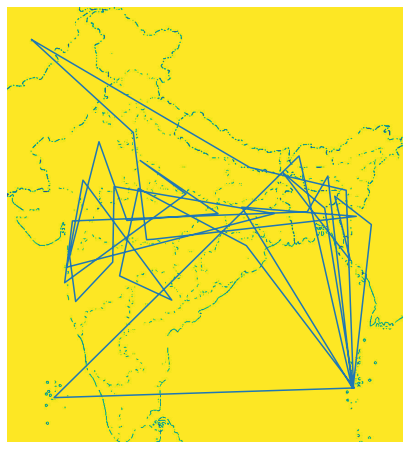

In [65]:
start_time = time.time()
results = AntColonyRunner(cities, distance_power=0, stop_factor=1, verbose=True, plot=True)
end_time = time.time()

print(end - start)

In [62]:
start_time = time.time()
results = GPUAntColonyRunner(cities, distance_power=0, stop_factor=1, verbose=True, plot=True)
end_time = time.time()

print(end - start)

TypeError: some keyword arguments unexpected

In [16]:
# results = AntColonyRunner(cities, distance_power=1, verbose=True, plot=True)

{'path_cost': 12768, 'ants_used': 1, 'epoch': 12058, 'round_trips': 1, 'clock': 0}
{'path_cost': 12736, 'ants_used': 2, 'epoch': 12471, 'round_trips': 1, 'clock': 0}
{'path_cost': 12237, 'ants_used': 77, 'epoch': 27403, 'round_trips': 2, 'clock': 0}
{'path_cost': 12225, 'ants_used': 458, 'epoch': 110999, 'round_trips': 8, 'clock': 0}
{'path_cost': 11967, 'ants_used': 518, 'epoch': 124793, 'round_trips': 9, 'clock': 0}
{'path_cost': 11162, 'ants_used': 540, 'epoch': 127835, 'round_trips': 9, 'clock': 0}
N=40  |  8154 -> 11180 |    1s | ants:   577 | trips:   10 | distance_power=0 stop_factor=1


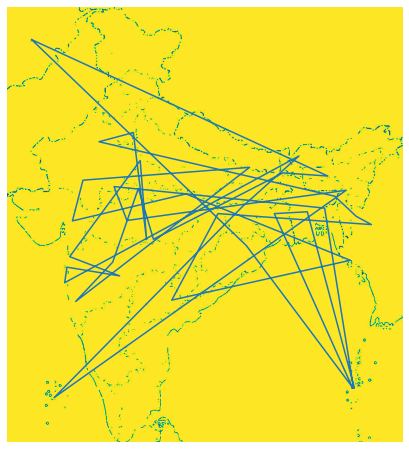

In [35]:
results = AntColonyRunner(cities, distance_power=0, stop_factor=1, verbose=True, plot=True)

In [20]:
import time

In [22]:
time.time()

1700375644.7282672

{'path_cost': 4608, 'ants_used': 1, 'epoch': 3827, 'round_trips': 1, 'clock': 0}
{'path_cost': 4557, 'ants_used': 65, 'epoch': 7837, 'round_trips': 2, 'clock': 0}
{'path_cost': 4461, 'ants_used': 66, 'epoch': 7851, 'round_trips': 2, 'clock': 0}
{'path_cost': 4281, 'ants_used': 71, 'epoch': 8231, 'round_trips': 2, 'clock': 0}
{'path_cost': 4277, 'ants_used': 129, 'epoch': 11333, 'round_trips': 3, 'clock': 0}
{'path_cost': 4263, 'ants_used': 140, 'epoch': 12137, 'round_trips': 3, 'clock': 0}
{'path_cost': 4260, 'ants_used': 157, 'epoch': 12485, 'round_trips': 3, 'clock': 0}
{'path_cost': 4219, 'ants_used': 196, 'epoch': 15452, 'round_trips': 4, 'clock': 0}
{'path_cost': 4088, 'ants_used': 219, 'epoch': 16118, 'round_trips': 4, 'clock': 0}
{'path_cost': 4011, 'ants_used': 15311, 'epoch': 849205, 'round_trips': 240, 'clock': 9}
N=40  |  8154 -> 4028 |   30s | ants: 45026 | trips:  706 | distance_power=5
30.01195788383484


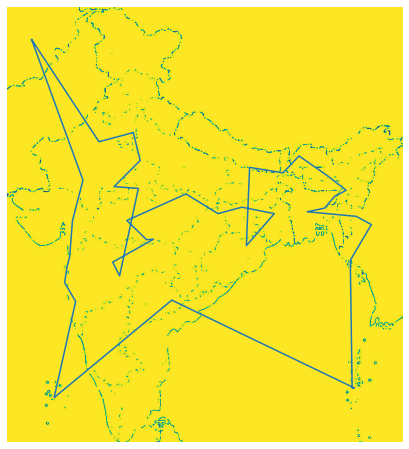

In [32]:
start = time.time()
results = AntColonyRunner(cities, distance_power=5, min_time=30, verbose=True, plot=True)
end = time.time()

print(end-start)

38.003562450408936

In [24]:
start

1700375672.7762566

In [25]:
end

1700375710.779819

In [9]:
from numba import jit, cuda

# PRActice

In [453]:
import threading

In [258]:
np.where()

array([-1])

In [34]:
import os
def set_threads(
    num_threads,
    set_blas_threads=True,
    set_numexpr_threads=True,
    set_openmp_threads=False
):
    num_threads = str(num_threads)
    if not num_threads.isdigit():
        raise ValueError("Number of threads must be an integer.")
    if set_blas_threads:
        os.environ["OPENBLAS_NUM_THREADS"] = num_threads
        os.environ["MKL_NUM_THREADS"] = num_threads
        os.environ["VECLIB_MAXIMUM_THREADS"] = num_threads
    if set_numexpr_threads:
        os.environ["NUMEXPR_NUM_THREADS"] = num_threads
    if set_openmp_threads:
        os.environ["OMP_NUM_THREADS"] = num_threads
set_threads(1)

In [35]:
import time
from itertools import chain
from typing import Any, Callable, List, Tuple, Union

import numpy as np
import random




In [39]:
class AntColonySolver:
        

    def __init__(self,
                    
                 
                 time=0,                  # run for a fixed amount of time
                 min_time=0,              # minimum runtime
                 timeout=0,               # maximum time in seconds to run for
                 stop_factor=2,           # how many times to redouble effort after new new best path
                 min_round_trips=10,      # minimum number of round trips before stopping
                 max_round_trips=0,       # maximum number of round trips before stopping                 
                 min_ants=0,              # Total number of ants to use
                 max_ants=0,              # Total number of ants to use
                 
                 ant_count=64,            # this is the bottom of the near-optimal range for numpy performance
                 ant_speed=1,             # how many steps do ants travel per epoch

                 distance_power=6,        # power to which distance affects pheromones                 
                 pheromone_power=2.25,    # power to which differences in pheromones are noticed
                 decay_power=1.25,           # how fast do pheromones decay
                 reward_power=5,          # relative pheromone reward based on best_path_length/path_length 
                 best_path_smell=2,       # queen multiplier for pheromones upon finding a new best path                  
                 start_smell=0,           # amount of starting pheromones [0 defaults to `10**self.distance_power`]

                 verbose=False,

    ):
        # assert callable(cost_fn)        
        print(threading.active_count())
        
        self.time            = int(time)
        self.min_time        = int(min_time)
        self.timeout         = int(timeout)
        self.stop_factor     = float(stop_factor)
        self.min_round_trips = int(min_round_trips)
        self.max_round_trips = int(max_round_trips)
        self.min_ants        = int(min_ants)
        self.max_ants        = int(max_ants)
    
        self.ant_count       = int(ant_count)
        self.ant_speed       = int(ant_speed)
        
        self.distance_power  = float(distance_power)     
        self.pheromone_power = float(pheromone_power)
        self.decay_power     = float(decay_power)
        self.reward_power    = float(reward_power)
        self.best_path_smell = float(best_path_smell)
        self.start_smell     = float(start_smell or 10**self.distance_power)
        
        self.verbose         = int(verbose)
        self._initalized     = False
        
        if self.min_round_trips and self.max_round_trips: self.min_round_trips = min(self.min_round_trips, self.max_round_trips)
        if self.min_ants and self.max_ants:               self.min_ants        = min(self.min_ants, self.max_ants)


    def solve_initialize(
            self,
            problem_path: List[Any],
    ):
        ### Cache of distances between nodes
        self.distances = {
            source: {
                dest: distance(source, dest)
                for dest in problem_path
            }
            for source in problem_path
        }

        ### Cache of distance costs between nodes - division in a tight loop is expensive
        self.distance_cost = {
            source: {
                dest: 1 / (1 + self.distances[source][dest]) ** self.distance_power
                for dest in problem_path
            }
            for source in problem_path
        }

        # print(self.distance_cost)
        ### This stores the pheromone trail that slowly builds up
        self.pheromones = {
            source: {
                # Encourage the ants to start exploring in all directions and furthest nodes
                dest: self.start_smell
                for dest in problem_path
            }
            for source in problem_path
        }
        
        ### Sanitise input parameters
        if self.ant_count <= 0:
            self.ant_count = len(problem_path)
        if self.ant_speed <= 0:
            self.ant_speed = np.median(list(chain(*[ d.values() for d in self.distances.values() ]))) // 5
        self.ant_speed = int(max(1,self.ant_speed))
        
        ### Heuristic Exports
        self.ants_used   = 0
        self.epochs_used = 0
        self.round_trips = 0
        self._initalized = True        


    def solve(self,
              problem_path: List[Any],
              restart=False,
    ):
        if restart or not self._initalized:
            # print("Not Yet Initialised !")
            self.solve_initialize(problem_path)

        # print("While solving :",threading.active_count())
        ### Here come the ants!
        ants = {
            "distance":    np.zeros((self.ant_count,)).astype('int32'),
            "path":        [ [ problem_path[0] ]   for n in range(self.ant_count) ],   # All the ants start from the home location
            "remaining":   [ set(problem_path[1:]) for n in range(self.ant_count) ],   # All the ants have these cities to cover
            "path_cost":   np.zeros((self.ant_count,)).astype('int32'),
            "round_trips": np.zeros((self.ant_count,)).astype('int32'),
        }

        # print("Ants :",ants)
        best_path       = None
        best_path_cost  = np.inf
        best_epochs     = []
        epoch           = 0
        time_start      = time.perf_counter()
        
        while True:
            epoch += 1

            ### Vectorized walking of ants
            # Small optimization here, testing against `> self.ant_speed` rather than `> 0` 
            #       avoids computing ants_arriving in the main part of this tight loop
            ants_travelling = (ants['distance'] > self.ant_speed)     # remove all the ants which are travelling with lower speed than minimum i.e. taking smaller steps than minimum desired step length
            ants['distance'][ ants_travelling ] -= self.ant_speed
            if all(ants_travelling):
                continue  # skip termination checks until the next ant arrives
            
            ### Vectorized checking of ants arriving
            ants_arriving       = np.invert(ants_travelling)
            ants_arriving_index = np.where(ants_arriving)[0]

            print(ants_arriving_index)
            for i in ants_arriving_index:

                ### ant has arrived at next_node
                this_node = ants['path'][i][-1]
                next_node = self.next_node(ants, i)
                
                ants['distance'][i]  = self.distances[ this_node ][ next_node ]
                ants['remaining'][i] = ants['remaining'][i] - {this_node}
                ants['path_cost'][i] = ants['path_cost'][i] + ants['distance'][i]
                ants['path'][i].append( next_node )

                ### ant has returned home to the colony
                if not ants['remaining'][i] and ants['path'][i][0] == ants['path'][i][-1]:
                    self.ants_used  += 1
                    self.round_trips = max(self.round_trips, ants["round_trips"][i] + 1)

                    ### We have found a new best path - inform the Queen
                    was_best_path = False
                    if ants['path_cost'][i] < best_path_cost:
                        was_best_path  = True
                        best_path_cost = ants['path_cost'][i]
                        best_path      = ants['path'][i]
                        best_epochs   += [ epoch ]
                        if self.verbose:
                            print({
                                "path_cost":   int(ants['path_cost'][i]),
                                "ants_used":   self.ants_used,
                                "epoch":       epoch,
                                "round_trips": ants['round_trips'][i] + 1,
                                "clock":       int(time.perf_counter() - time_start),
                            })

                    ### leave pheromone trail
                    # doing this only after ants arrive home improves initial exploration
                    #  * self.round_trips has the effect of decaying old pheromone trails
                    # ** self.reward_power = -3 has the effect of encouraging ants to explore longer routes
                    #                           in combination with doubling pheromone for best_path
                    reward = 1
                    if self.reward_power: reward *= ((best_path_cost / ants['path_cost'][i]) ** self.reward_power)
                    if self.decay_power:  reward *= (self.round_trips ** self.decay_power)
                    for path_index in range( len(ants['path'][i]) - 1 ):
                        this_node = ants['path'][i][path_index]
                        next_node = ants['path'][i][path_index+1]
                        self.pheromones[this_node][next_node] += reward
                        self.pheromones[next_node][this_node] += reward
                        if was_best_path:
                            # Queen orders to double the number of ants following this new best path                            
                            self.pheromones[this_node][next_node] *= self.best_path_smell
                            self.pheromones[next_node][this_node] *= self.best_path_smell


                    ### reset ant
                    ants["distance"][i]     = 0
                    ants["path"][i]         = [ problem_path[0] ]
                    ants["remaining"][i]    = set(problem_path[1:])
                    ants["path_cost"][i]    = 0
                    ants["round_trips"][i] += 1


            ### Do we terminate?
            
            # Always wait for at least 1 solutions (note: 2+ solutions are not guaranteed)
            if not len(best_epochs): continue 
            
            # Timer takes priority over other constraints
            if self.time or self.min_time or self.timeout:
                clock = time.perf_counter() - time_start
                if self.time:
                    if clock > self.time: break
                    else:                 continue
                if self.min_time and clock < self.min_time: continue
                if self.timeout  and clock > self.timeout:  break
            
            # First epoch only has start smell - question: how many epochs are required for a reasonable result?
            if self.min_round_trips and self.round_trips <  self.min_round_trips: continue        
            if self.max_round_trips and self.round_trips >= self.max_round_trips: break

            # This factor is most closely tied to computational power                
            if self.min_ants and self.ants_used <  self.min_ants: continue        
            if self.max_ants and self.ants_used >= self.max_ants: break            
            
            # Lets keep redoubling our efforts until we can't find anything more
            if self.stop_factor and epoch > (best_epochs[-1] * self.stop_factor): break
                                
            # Nothing else is stopping us: Queen orders the ants to continue!      
            if True: continue
            
            
            
        ### We have (hopefully) found a near-optimal path, report back to the Queen
        self.epochs_used = epoch
        self.round_trips = np.max(ants["round_trips"])
        return best_path


    def next_node(self, ants, index):
        this_node   = ants['path'][index][-1]

        weights     = []
        weights_sum = 0
        if not ants['remaining'][index]: return ants['path'][index][0]  # return home
        for next_node in ants['remaining'][index]:
            if next_node == this_node: continue
            reward = (
                    self.pheromones[this_node][next_node] ** self.pheromone_power
                    * self.distance_cost[this_node][next_node]  # Prefer shorter paths
            )
            weights.append( (reward, next_node) )
            weights_sum   += reward

        # Pick a random path in proportion to the weight of the pheromone
        rand = random.random() * weights_sum
        for (weight, next_node) in weights:
            if rand > weight: rand -= weight
            else:             break
        return next_node
            


# class GPUAntColonySolver:
        
#     import time
#     from itertools import chain
#     from typing import Any, Callable, List, Tuple, Union
    
#     import numpy as np
#     import random
    
    
#     import os
#     def __init__(self,
                    
                 
#                  time=0,                  # run for a fixed amount of time
#                  min_time=0,              # minimum runtime
#                  timeout=0,               # maximum time in seconds to run for
#                  stop_factor=2,           # how many times to redouble effort after new new best path
#                  min_round_trips=10,      # minimum number of round trips before stopping
#                  max_round_trips=0,       # maximum number of round trips before stopping                 
#                  min_ants=0,              # Total number of ants to use
#                  max_ants=0,              # Total number of ants to use
                 
#                  ant_count=64,            # this is the bottom of the near-optimal range for numpy performance
#                  ant_speed=1,             # how many steps do ants travel per epoch

#                  distance_power=6,        # power to which distance affects pheromones                 
#                  pheromone_power=2.25,    # power to which differences in pheromones are noticed
#                  decay_power=1.25,           # how fast do pheromones decay
#                  reward_power=5,          # relative pheromone reward based on best_path_length/path_length 
#                  best_path_smell=2,       # queen multiplier for pheromones upon finding a new best path                  
#                  start_smell=0,           # amount of starting pheromones [0 defaults to `10**self.distance_power`]

#                  verbose=False,

#     ):
#         # assert callable(cost_fn)        
#         set_threads(ant_count)
#         self.time            = int(time)
#         self.min_time        = int(min_time)
#         self.timeout         = int(timeout)
#         self.stop_factor     = float(stop_factor)
#         self.min_round_trips = int(min_round_trips)
#         self.max_round_trips = int(max_round_trips)
#         self.min_ants        = int(min_ants)
#         self.max_ants        = int(max_ants)
    
#         self.ant_count       = int(ant_count)
#         self.ant_speed       = int(ant_speed)
        
#         self.distance_power  = float(distance_power)     
#         self.pheromone_power = float(pheromone_power)
#         self.decay_power     = float(decay_power)
#         self.reward_power    = float(reward_power)
#         self.best_path_smell = float(best_path_smell)
#         self.start_smell     = float(start_smell or 10**self.distance_power)
        
#         self.verbose         = int(verbose)
#         self._initalized     = False
#         print(threading.active_count())
        
#         if self.min_round_trips and self.max_round_trips: self.min_round_trips = min(self.min_round_trips, self.max_round_trips)
#         if self.min_ants and self.max_ants:               self.min_ants        = min(self.min_ants, self.max_ants)


#     def solve_initialize(
#             self,
#             problem_path: List[Any],
#     ):
#         ### Cache of distances between nodes
#         self.distances = {
#             source: {
#                 dest: distance(source, dest)
#                 for dest in problem_path
#             }
#             for source in problem_path
#         }

#         ### Cache of distance costs between nodes - division in a tight loop is expensive
#         self.distance_cost = {
#             source: {
#                 dest: 1 / (1 + self.distances[source][dest]) ** self.distance_power
#                 for dest in problem_path
#             }
#             for source in problem_path
#         }

#         # print(self.distance_cost)
#         ### This stores the pheromone trail that slowly builds up
#         self.pheromones = {
#             source: {
#                 # Encourage the ants to start exploring in all directions and furthest nodes
#                 dest: self.start_smell
#                 for dest in problem_path
#             }
#             for source in problem_path
#         }
        
#         ### Sanitise input parameters
#         if self.ant_count <= 0:
#             self.ant_count = len(problem_path)
#         if self.ant_speed <= 0:
#             self.ant_speed = np.median(list(chain(*[ d.values() for d in self.distances.values() ]))) // 5
#         self.ant_speed = int(max(1,self.ant_speed))
        
#         ### Heuristic Exports
#         self.ants_used   = 0
#         self.epochs_used = 0
#         self.round_trips = 0
#         self._initalized = True        


#     def solve(self,
#               problem_path: List[Any],
#               restart=False,
#     ):
#         if restart or not self._initalized:
#             # print("Not Yet Initialised !")
#             self.solve_initialize(problem_path)

#         ### Here come the ants!
#         ants = {
#             "distance":    np.zeros((self.ant_count,)).astype('int32'),
#             "path":        [ [ problem_path[0] ]   for n in range(self.ant_count) ],   # All the ants start from the home location
#             "remaining":   [ set(problem_path[1:]) for n in range(self.ant_count) ],   # All the ants have these cities to cover
#             "path_cost":   np.zeros((self.ant_count,)).astype('int32'),
#             "round_trips": np.zeros((self.ant_count,)).astype('int32'),
#         }

#         # print("Ants :",ants)
#         best_path       = None
#         best_path_cost  = np.inf
#         best_epochs     = []
#         epoch           = 0
#         time_start      = time.perf_counter()
#         print("While solving :",threading.active_count())
        
#         while True:
#             epoch += 1

#             ### Vectorized walking of ants
#             # Small optimization here, testing against `> self.ant_speed` rather than `> 0` 
#             #       avoids computing ants_arriving in the main part of this tight loop
#             ants_travelling = (ants['distance'] > self.ant_speed)     # remove all the ants which are travelling with lower speed than minimum i.e. taking smaller steps than minimum desired step length
#             ants['distance'][ ants_travelling ] -= self.ant_speed
#             if all(ants_travelling):
#                 continue  # skip termination checks until the next ant arrives
            
#             ### Vectorized checking of ants arriving
#             ants_arriving       = np.invert(ants_travelling)
#             ants_arriving_index = np.where(ants_arriving)[0]
            
#             for i in ants_arriving_index:

#                 ### ant has arrived at next_node
#                 this_node = ants['path'][i][-1]
#                 next_node = self.next_node(ants, i)
                
#                 ants['distance'][i]  = self.distances[ this_node ][ next_node ]
#                 ants['remaining'][i] = ants['remaining'][i] - {this_node}
#                 ants['path_cost'][i] = ants['path_cost'][i] + ants['distance'][i]
#                 ants['path'][i].append( next_node )

#                 ### ant has returned home to the colony
#                 if not ants['remaining'][i] and ants['path'][i][0] == ants['path'][i][-1]:
#                     self.ants_used  += 1
#                     self.round_trips = max(self.round_trips, ants["round_trips"][i] + 1)

#                     ### We have found a new best path - inform the Queen
#                     was_best_path = False
#                     if ants['path_cost'][i] < best_path_cost:
#                         was_best_path  = True
#                         best_path_cost = ants['path_cost'][i]
#                         best_path      = ants['path'][i]
#                         best_epochs   += [ epoch ]
#                         if self.verbose:
#                             print({
#                                 "path_cost":   int(ants['path_cost'][i]),
#                                 "ants_used":   self.ants_used,
#                                 "epoch":       epoch,
#                                 "round_trips": ants['round_trips'][i] + 1,
#                                 "clock":       int(time.perf_counter() - time_start),
#                             })

#                     ### leave pheromone trail
#                     # doing this only after ants arrive home improves initial exploration
#                     #  * self.round_trips has the effect of decaying old pheromone trails
#                     # ** self.reward_power = -3 has the effect of encouraging ants to explore longer routes
#                     #                           in combination with doubling pheromone for best_path
#                     reward = 1
#                     if self.reward_power: reward *= ((best_path_cost / ants['path_cost'][i]) ** self.reward_power)
#                     if self.decay_power:  reward *= (self.round_trips ** self.decay_power)
#                     for path_index in range( len(ants['path'][i]) - 1 ):
#                         this_node = ants['path'][i][path_index]
#                         next_node = ants['path'][i][path_index+1]
#                         self.pheromones[this_node][next_node] += reward
#                         self.pheromones[next_node][this_node] += reward
#                         if was_best_path:
#                             # Queen orders to double the number of ants following this new best path                            
#                             self.pheromones[this_node][next_node] *= self.best_path_smell
#                             self.pheromones[next_node][this_node] *= self.best_path_smell


#                     ### reset ant
#                     ants["distance"][i]     = 0
#                     ants["path"][i]         = [ problem_path[0] ]
#                     ants["remaining"][i]    = set(problem_path[1:])
#                     ants["path_cost"][i]    = 0
#                     ants["round_trips"][i] += 1


#             ### Do we terminate?
            
#             # Always wait for at least 1 solutions (note: 2+ solutions are not guaranteed)
#             if not len(best_epochs): continue 
            
#             # Timer takes priority over other constraints
#             if self.time or self.min_time or self.timeout:
#                 clock = time.perf_counter() - time_start
#                 if self.time:
#                     if clock > self.time: break
#                     else:                 continue
#                 if self.min_time and clock < self.min_time: continue
#                 if self.timeout  and clock > self.timeout:  break
            
#             # First epoch only has start smell - question: how many epochs are required for a reasonable result?
#             if self.min_round_trips and self.round_trips <  self.min_round_trips: continue        
#             if self.max_round_trips and self.round_trips >= self.max_round_trips: break

#             # This factor is most closely tied to computational power                
#             if self.min_ants and self.ants_used <  self.min_ants: continue        
#             if self.max_ants and self.ants_used >= self.max_ants: break            
            
#             # Lets keep redoubling our efforts until we can't find anything more
#             if self.stop_factor and epoch > (best_epochs[-1] * self.stop_factor): break
                                
#             # Nothing else is stopping us: Queen orders the ants to continue!      
#             if True: continue
            
            
            
#         ### We have (hopefully) found a near-optimal path, report back to the Queen
#         self.epochs_used = epoch
#         self.round_trips = np.max(ants["round_trips"])
#         return best_path


#     def next_node(self, ants, index):
#         this_node   = ants['path'][index][-1]

#         weights     = []
#         weights_sum = 0
#         if not ants['remaining'][index]: return ants['path'][index][0]  # return home
#         for next_node in ants['remaining'][index]:
#             if next_node == this_node: continue
#             reward = (
#                     self.pheromones[this_node][next_node] ** self.pheromone_power
#                     * self.distance_cost[this_node][next_node]  # Prefer shorter paths
#             )
#             weights.append( (reward, next_node) )
#             weights_sum   += reward

#         # Pick a random path in proportion to the weight of the pheromone
#         rand = random.random() * weights_sum
#         for (weight, next_node) in weights:
#             if rand > weight: rand -= weight
#             else:             break
#         return next_node

In [40]:
# @jit(target_backend= 'cpu',parallel = False)
def CPUAntColonyRunner(cities,ant_count):
    solver     = AntColonySolver(ant_count = ant_count, verbose=False)
    start_time = time.perf_counter()
    result     = solver.solve(cities)
    stop_time  = time.perf_counter()
    
        
    # for key in ['verbose', 'plot', 'animate', 'label', 'min_time', 'max_time']:
    #     if key in kwargs: del kwargs[key]
    # print("N={:<3d} | {:5.0f} -> {:4.0f} | {:4.0f}s | ants: {:5d} | trips: {:4d} | "
    #       .format(len(cities), path_distance(cities), path_distance(result), (stop_time - start_time), solver.ants_used, solver.round_trips)
    #       + " ".join([ f"{k}={v}" for k,v in kwargs.items() ])
    # )
    
    show_path(result)
    return result,solver.distance_cost


# # @numba.vectorize
# @jit(target_backend= 'cuda',parallel = True)
# def GPUAntColonyRunner(cities,ant_count):
#     solver     = GPUAntColonySolver( ant_count = ant_count,verbose=False)
#     start_time = time.perf_counter()
#     result     = solver.solve(cities)
#     stop_time  = time.perf_counter()
    
        
    # for key in ['verbose', 'plot', 'animate', 'label', 'min_time', 'max_time']:
    #     if key in kwargs: del kwargs[key]
    # print("N={:<3d} | {:5.0f} -> {:4.0f} | {:4.0f}s | ants: {:5d} | trips: {:4d} | "
    #       .format(len(cities), path_distance(cities), path_distance(result), (stop_time - start_time), solver.ants_used, solver.round_trips)
    #       + " ".join([ f"{k}={v}" for k,v in kwargs.items() ])
    # )
    
    show_path(result)
    return result

/tmp/ipykernel_3726/4020835761.py:21: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(target_backend= 'cuda',parallel = True)


In [25]:
start = time.time()
GPUAntColonyRunner(tup_cities,100)
end = time.time()
print(end - start)

NameError: name 'tup_cities' is not defined

In [32]:
import math

In [38]:
start = time.time()
CPUAntColonyRunner(tup_cities,100)
end = time.time()
print(end-start)

8
While solving : 8
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 0  4  7  8 13 14 17 22 23 24 27 28 32 33 35 37 38 41 42 44 46 47 48 53
 54 55 56 58 59 63 64 65 66 67 71 74 80 84 87 90 93 95 96 97 99]
[ 1  9 12 16 31 36 40 45 51 60 61 62 70 72 75 81 86 91]
[ 3 15 21 34 89]
[ 4  7  8 13 14 23 24 33 35 37 38 42 44 48 54 56 58 65 71 74 84 87 90 93
 95 97]
[ 6 19 26 68 69 78 94]
[ 0 28 41 47 53 59 67 96]
[ 1  9 40 45 60 61 62 70 72 75 81 86 91]
[27 46 55 80]
[39 79]
[17 22 32 64]
[12 31]
[15 21]
[20 30 52]
[63]
[49 88]
[ 4  7  8 13 14 23 24 33 35 37 38 42 44 48 54 56 58 65 71 74 84 87 90 93
 95 97]
[68 94]
[ 6 19 26 69]
[ 3 89]
[79]
[36]
[ 1  9 17 32 40 45 60 61 64 75 81 86 91]
[46 80]
[ 0 28 41 47 53 55 96]
[39]
[62 70 72]
[25 73 

NameError: name 'show_path' is not defined

In [16]:
tup_cities

NameError: name 'tup_cities' is not defined

Ants : {'distance': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32), 'path': [[(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [(53.0, 71.0)], [

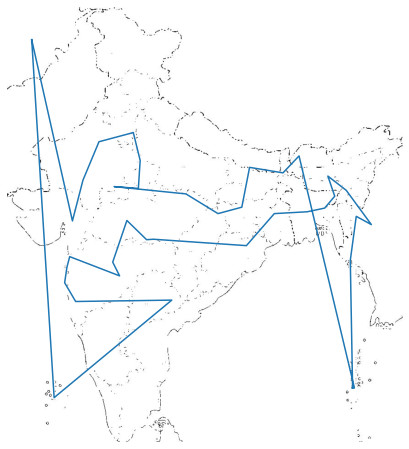

In [231]:
result, distance_costs = AntColonyRunner(tup_cities, distance_power=1,verbose = False)

In [225]:
distance_costs[(53.0, 71.0)]

{(53.0, 71.0): 1.0,
 (102.0, 853.0): 0.0012746425654108326,
 (125.0, 602.0): 0.0018626860504755492,
 (130.0, 568.0): 0.001984404885434751,
 (136.0, 545.0): 0.0020737766297337246,
 (142.0, 467.0): 0.0024577388094032984,
 (149.0, 643.0): 0.0017211703958691911,
 (165.0, 378.0): 0.0030507152480129178,
 (200.0, 294.0): 0.003730066368607323,
 (230.0, 557.0): 0.0019296518797827485,
 (233.0, 392.0): 0.002709857480074242,
 (245.0, 587.0): 0.001813028374512367,
 (261.0, 466.0): 0.0022350465938155025,
 (275.0, 274.0): 0.0033132270754450705,
 (286.0, 396.0): 0.0024944343833884926,
 (290.0, 335.0): 0.0028107685781138527,
 (304.0, 508.0): 0.0019803769870069187,
 (319.0, 507.0): 0.0019541298395783896,
 (359.0, 640.0): 0.001545445309625833,
 (390.0, 408.0): 0.0020938463153063265,
 (460.0, 451.0): 0.0017926915762826923,
 (512.0, 437.0): 0.0017005127693509579,
 (522.0, 521.0): 0.0015361691031284864,
 (529.0, 350.0): 0.001809168949687988,
 (583.0, 451.0): 0.00153104119555234,
 (602.0, 362.0): 0.001606800

In [5]:
def imshow(im):
    figure = graph.figure(figsize = (5,5))
    graph.imshow(im,cmap = 'gray')

def distance(xy1, xy2) -> float:
    return math.sqrt( (xy1[0]-xy2[0])**2 + (xy1[1]-xy2[1])**2 )

def path_distance(path) -> int:
    if isinstance(path, dict):      path = list(path.values())            # if path == {"Name": (x,y)}
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]   # if path == ("Name", (x,y))
    return int(sum(
        [ distance(path[i],  path[i+1]) for i in range(len(path)-1) ]
      + [ distance(path[-1], path[0]) ]                                   # include cost of return journey
    ))

In [162]:
[print(i[1]) for i in cities]

IndexError: string index out of range

In [170]:
k = []
distances = {source: { dest: distance(source, dest) for dest in tup_cities } for source in tup_cities}
print(sum(k))

0


,x,y
0,53.0,71.0
1,102.0,853.0
2,125.0,602.0
3,130.0,568.0
4,136.0,545.0
5,142.0,467.0
6,149.0,643.0
7,165.0,378.0
8,200.0,294.0
9,230.0,557.0


In [133]:
distance(cities['0'],cities['4'])

481.21201148766016

In [26]:
df_points = analytics.read_csv("../data/documents/points_values.csv")
tup_cities = []
for point in df_points.iterrows():
    point = point[1]
    tup_cities.append( (point['x'] , point['y']))
tup_cities
    

[(53.0, 71.0),
 (102.0, 853.0),
 (125.0, 602.0),
 (130.0, 568.0),
 (136.0, 545.0),
 (142.0, 467.0),
 (149.0, 643.0),
 (165.0, 378.0),
 (200.0, 294.0),
 (230.0, 557.0),
 (233.0, 392.0),
 (245.0, 587.0),
 (261.0, 466.0),
 (275.0, 274.0),
 (286.0, 396.0),
 (290.0, 335.0),
 (304.0, 508.0),
 (319.0, 507.0),
 (359.0, 640.0),
 (390.0, 408.0),
 (460.0, 451.0),
 (512.0, 437.0),
 (522.0, 521.0),
 (529.0, 350.0),
 (583.0, 451.0),
 (602.0, 362.0),
 (637.0, 325.0),
 (655.0, 447.0),
 (693.0, 439.0),
 (700.0, 369.0),
 (715.0, 413.0),
 (740.0, 400.0),
 (749.0, 553.0),
 (753.0, 832.0),
 (754.0, 832.0),
 (755.0, 832.0),
 (756.0, 832.0),
 (758.0, 832.0),
 (762.0, 457.0),
 (795.0, 475.0)]